In [1]:
import torch
import numpy as np
import pandas as pd

from torch import nn
from torch import optim
from tqdm import trange, tqdm_notebook
from torch.nn import functional as F
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn import model_selection as ms
from torchvision import datasets, transforms

In [2]:
train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
train_data = torch.utils.data.DataLoader(train, batch_size=8, shuffle=True)
test_data = torch.utils.data.DataLoader(test, batch_size=8, shuffle=True)

In [4]:
# dataset = fetch_openml('mnist_784')
# x = np.array(dataset['data'])
# y = np.array(dataset['target'], dtype='int32')
# x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.25, random_state=1)
# train_data = zip(torch.Tensor(x_train), torch.Tensor(y_train))
# test_data = zip(torch.Tensor(x_test), torch.Tensor(y_test))

In [5]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 128)
        self.l2 = nn.Linear(128, 10)
        
    def forward(self, input):
        input = F.relu(self.l1(input))
        input = F.log_softmax(self.l2(input), dim=1)
        return input

In [6]:
EPOCHS = 5
net = Net()
opt = optim.Adam(net.parameters(), lr = 0.001)

for epoch in trange(EPOCHS):
    for x, y in train_data:
        opt.zero_grad()
        output = net(x.view(-1, 784))
        #  https://discuss.pytorch.org/t/does-nllloss-handle-log-softmax-and-softmax-in-the-same-way/8835
        loss = F.nll_loss(output, y)
        loss.backward()
        opt.step()
    print(loss)

 20%|██        | 1/5 [00:12<00:48, 12.07s/it]

tensor(0.0734, grad_fn=<NllLossBackward>)


 40%|████      | 2/5 [00:24<00:37, 12.44s/it]

tensor(0.0051, grad_fn=<NllLossBackward>)


 60%|██████    | 3/5 [00:36<00:24, 12.24s/it]

tensor(0.0254, grad_fn=<NllLossBackward>)


 80%|████████  | 4/5 [00:48<00:12, 12.12s/it]

tensor(0.0078, grad_fn=<NllLossBackward>)


100%|██████████| 5/5 [01:01<00:00, 12.20s/it]

tensor(0.0052, grad_fn=<NllLossBackward>)


In [11]:
total = 0
correct = 0

with torch.no_grad():
    for data in test_data:
        x, y = data
        output = net(x.view(-1, 784))
        correct += int(torch.sum(y == torch.argmax(output, axis = 1)))
        total += len(output)

print(f"Accuracy: {correct/total * 100}%")

Accuracy: 97.83%


In [8]:
outputs = []
with torch.no_grad():
    for data in test_data:
        x, y = data
        output = net(x.view(-1, 784))
        outputs.extend(list(torch.max(output, 1)[0].numpy()))
outputs = np.array(outputs)

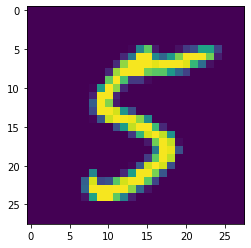

In [9]:
# let's take a look at the most weird image
idx = np.argmin(outputs)

for i, data in enumerate(test_data):
    if i == idx//8:
        x, y = data
        plt.imshow(x[idx%8].view(28, 28))